In [3]:
from esa_climate_toolbox.core import list_ecvs

list_ecvs()

['FIRE',
 'LC',
 'OC',
 'CLOUD',
 'SEAICE',
 'AEROSOL',
 'SNOW',
 'SEASTATE',
 'VEGETATION',
 'SEALEVEL',
 'ICESHEETS',
 'LST',
 'WATERVAPOUR',
 'SEASURFACESALINITY',
 'BIOMASS',
 'RD',
 'LAKES',
 'PERMAFROST',
 'SST',
 'GHG',
 'OZONE',
 'SOILMOISTURE']

In [5]:
from esa_climate_toolbox.core import list_ecv_datasets

list_ecv_datasets("LC")

[('esacci.LC.13-yrs.L4.WB.ASAR.Envisat.Map.4-0.r1', 'esa-cci'),
 ('esacci.LC.5-yrs.L4.CHANGE.multi-sensor.multi-platform.HRLCC30-A01.v1-2.Africa',
  'esa-cci'),
 ('esacci.LC.5-yrs.L4.CHANGE.multi-sensor.multi-platform.HRLCC30-A02.v1-2.Amazonia',
  'esa-cci'),
 ('esacci.LC.5-yrs.L4.CHANGE.multi-sensor.multi-platform.HRLCC30-A03.v1-2.Siberia',
  'esa-cci'),
 ('esacci.LC.5-yrs.L4.Map.multi-sensor.multi-platform.HRLC30-A01.v1-2.Africa',
  'esa-cci'),
 ('esacci.LC.5-yrs.L4.Map.multi-sensor.multi-platform.HRLC30-A02.v1-2.Amazonia',
  'esa-cci'),
 ('esacci.LC.5-yrs.L4.Map.multi-sensor.multi-platform.HRLC30-A03.v1-2.Siberia',
  'esa-cci'),
 ('esacci.LC.yr.L4.LCCS.multi-sensor.multi-platform.Map.2-0-7.r1', 'esa-cci'),
 ('esacci.LC.yr.L4.Map.multi-sensor.multi-platform.HRLC10-A01.v1-2.Africa',
  'esa-cci'),
 ('esacci.LC.yr.L4.Map.multi-sensor.multi-platform.HRLC10-A02.v1-2.Amazonia',
  'esa-cci'),
 ('esacci.LC.yr.L4.Map.multi-sensor.multi-platform.HRLC10-A03.v1-2.Siberia',
  'esa-cci'),
 ('esacc

In [1]:
from xcube.core.store import new_data_store

ds = new_data_store("esa-cci-kc")

In [2]:
cube = ds.open_data("ESACCI-LC-L4-PFT-Map-300m-P1Y-1992-2020-v2.0.8-kr1.1")

In [3]:
cube

<xarray.Dataset> Size: 4TB
Dimensions:       (time: 29, lat: 64800, lon: 129600, bounds: 2)
Coordinates:
  * lat           (lat) float64 518kB 90.0 90.0 89.99 ... -89.99 -90.0 -90.0
  * lon           (lon) float64 1MB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * time          (time) datetime64[ns] 232B 1992-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables: (12/21)
    BARE          (time, lat, lon) int8 244GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    BUILT         (time, lat, lon) int8 244GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    GRASS-MAN     (time, lat, lon) int8 244GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    GRASS-NAT     (time, lat, lon) int8 244GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    INLAND-WATER  (time, lat, lon) int8 244GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    LAND          (time, lat, lon) int8 244GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    ...            ...
    WATER         (time, lat, lon) int8 244GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    WATER_INLAND  (time, lat, lon) int8 244GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    WATER_OCEAN   (time, lat, lon) int8 244GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    lat_bounds    (time, lat, bounds) float64 30MB dask.array<chunksize=(1, 64800, 2), meta=np.ndarray>
    lon_bounds    (time, lon, bounds) float64 60MB dask.array<chunksize=(1, 129600, 2), meta=np.ndarray>
    time_bounds   (time, bounds) datetime64[ns] 464B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    citation:                   Harper et al., submitted. A 29-year time seri...
    contact:                    contact@esa-landcover-cci.org
    creator_email:              contact@esa-landcover-cci.org
    ...                         ...
    time_coverage_start:        19920101
    title:                      ESA CCI Land Cover Project: Maps of Plant Fun...
    tracking_id:                62f1a9cb-c726-4006-a3ac-c5ee8fdc70af
    type:                       ESACCI-LC-L4-PFT-Map-300m-P1Y
    kerchunk_revision:          kr1.1
    kerchunk_creation_date:     031023T093154

In [17]:
cube_year = {year: None for year in [1992, 2020]}

for year in cube_year.keys():
    cube_year[year] = cube.sel({
        "lat": slice(-23.5, -24.5),
        "lon": slice(-70, -68),
        "time": slice(f"{year}-01-01", f"{year}-12-31"),
    }).load()

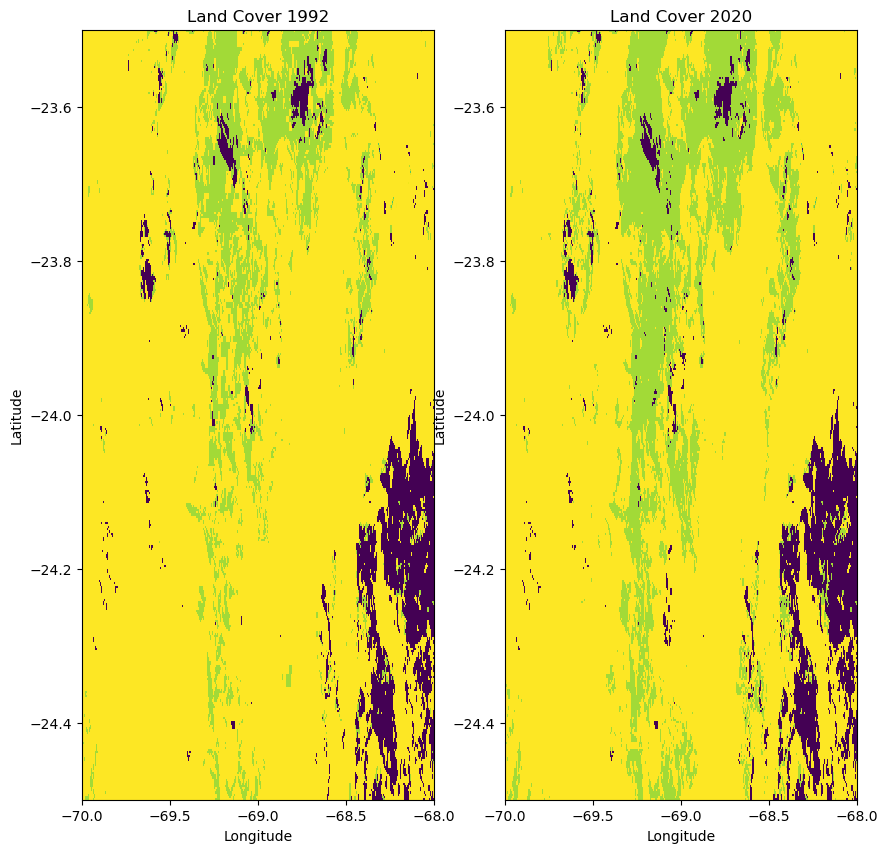

In [24]:
import matplotlib.pyplot as plt

# create 2x1 subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
for idx, year in enumerate(cube_year.keys()):
    # plot the data
    cube_year[year].BARE.squeeze().plot.imshow(ax=ax[idx], add_colorbar=False)
    ax[idx].set_title(f"Land Cover {year}")
    ax[idx].set_xlabel("Longitude")
    ax[idx].set_ylabel("Latitude")